# A Gentle Introduction to PyTorch

TAs: Kinshuk Vasisht, Debarpan Bhattacharya

### Installation and Setup

- [https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/)

In [ ]:
!nvidia-smi | head -4

In [ ]:
%pip3 install torch --index-url https://download.pytorch.org/whl/cu118

In [ ]:
# Visualization purposes only, not required for using PyTorch
%pip install graphviz torchviz

In [1]:
import gc

In [2]:
import torch

In [3]:
import numpy
import torchviz
import tqdm.auto as tqdm

from matplotlib import pyplot

> Check if `pytorch` can access your GPU:

In [4]:
torch.cuda.is_available()

True

> View available GPU devices (number of GPUs):

- Note: GPU devices are 0-indexed

In [ ]:
torch.cuda.device_count()

### Quickstart - Tensors

#### Basics

In [6]:
# creating a tensor: torch.tensor and torch.as_tensor

data = torch.tensor([[ 1, 2, 3 ], [ 4, 5, 6 ]])
data

tensor([[1, 2, 3],
        [4, 5, 6]])

In [7]:
data2 = torch.as_tensor(data)
data2

tensor([[1, 2, 3],
        [4, 5, 6]])

In [8]:
# as_tensor vs tensor

data2[1, 2] = 9000
data[1, 2]

tensor(9000)

In [12]:
# from a numpy array

np_data = numpy.random.rand(3, 2)
pt_data = torch.as_tensor(np_data)

# as tensor allows modifying source numpy array!
pt_data[0, 1] = 900

np_data

array([[3.52025544e-01, 9.00000000e+02],
       [1.34689877e-01, 4.64551755e-02],
       [2.59624476e-01, 6.20976702e-02]])

In [13]:
# basic properties: type of elements, dimensions

def describe(tensor: torch.Tensor):
    print("> Shape   :", tensor.shape)
    print("> Datatype:", tensor.dtype)
    print("> Device  :", tensor.device)

describe(data)

> Shape   : torch.Size([2, 3])
> Datatype: torch.int64
> Device  : cpu


In [14]:
# from tensors to other types:

# list
print(data.tolist(), type(data.tolist()))

# numpy array
print(data.numpy(), type(data.numpy()))

[[1, 2, 3], [4, 5, 9000]] <class 'list'>
[[   1    2    3]
 [   4    5 9000]] <class 'numpy.ndarray'>


#### Tensor Operations

Most operations available out-of-the-box, with the same name as `numpy` operations.

Terminology differences:

| `numpy` | `torch` |
| --- | --- |
| `shape` | `shape` (property) / `size` (method), `size` (function parameters) |
| `axis` | `dim` |
| `size` | `numel` (method) |

In [15]:
torch.manual_seed(20240130)
data = torch.rand(5, 6)
data

tensor([[0.1134, 0.8998, 0.6722, 0.3071, 0.8054, 0.9761],
        [0.1821, 0.9739, 0.9675, 0.7556, 0.7555, 0.1140],
        [0.8622, 0.7942, 0.8220, 0.5289, 0.9448, 0.8081],
        [0.7805, 0.4342, 0.6890, 0.7416, 0.8267, 0.5480],
        [0.6252, 0.1345, 0.4159, 0.3040, 0.7204, 0.7056]])

In [16]:
# mathematical functions: arithmetic, vector operations

data + data
data * data
data.T @ data

tensor([[1.7894, 1.3871, 1.7589, 1.3972, 2.1390, 1.6970],
        [1.3871, 2.5955, 2.5550, 1.7952, 2.6666, 1.9640],
        [1.7589, 2.5550, 2.7113, 2.0096, 2.9181, 2.1017],
        [1.3972, 1.7952, 2.0096, 1.5873, 2.1499, 1.4343],
        [2.1390, 2.6666, 2.9181, 2.1499, 3.3142, 2.5970],
        [1.6970, 1.9640, 2.1017, 1.4343, 2.5970, 2.4170]])

In [17]:
# concatenations: torch.cat, torch.stack

torch.cat([ data, data ])

tensor([[0.1134, 0.8998, 0.6722, 0.3071, 0.8054, 0.9761],
        [0.1821, 0.9739, 0.9675, 0.7556, 0.7555, 0.1140],
        [0.8622, 0.7942, 0.8220, 0.5289, 0.9448, 0.8081],
        [0.7805, 0.4342, 0.6890, 0.7416, 0.8267, 0.5480],
        [0.6252, 0.1345, 0.4159, 0.3040, 0.7204, 0.7056],
        [0.1134, 0.8998, 0.6722, 0.3071, 0.8054, 0.9761],
        [0.1821, 0.9739, 0.9675, 0.7556, 0.7555, 0.1140],
        [0.8622, 0.7942, 0.8220, 0.5289, 0.9448, 0.8081],
        [0.7805, 0.4342, 0.6890, 0.7416, 0.8267, 0.5480],
        [0.6252, 0.1345, 0.4159, 0.3040, 0.7204, 0.7056]])

In [18]:
torch.stack([ data, data ]).shape

torch.Size([2, 5, 6])

#### The PyTorch Advantage: Built-in Acceleration over faster hardware

Devices in PyTorch:

- Controls where memory for the tensor is reserved, and corresponding operations are performed.
- Default device: `cpu`: Stored in device RAM, computations on device CPU.
- Acceleration: `cuda[:{index}]`: Stored on GPU VRAM, computations on GPU.

In [19]:
print(data.device)
data = data.to('cuda')
# or
data = data.cuda()
print(data.device)

cpu
cuda:0


In [20]:
torch.manual_seed(20240130)

pt_data1     = torch.rand(12, 4096, 768)
pt_data1_acc = pt_data1.to('cuda')
np_data1     = pt_data1.numpy()

pt_data2     = torch.rand(12, 768, 4096)
pt_data2_acc = pt_data2.to('cuda')
np_data2     = pt_data2.numpy()

In [21]:
gc.collect()
torch.cuda.empty_cache()
torch.cuda.synchronize()

In [22]:
%%timeit -r 4
pt_data2_acc @ pt_data1_acc

37.3 µs ± 25 µs per loop (mean ± std. dev. of 4 runs, 1 loop each)


In [23]:
%%timeit -r 4
pt_data2 @ pt_data1

52.7 ms ± 5.06 ms per loop (mean ± std. dev. of 4 runs, 10 loops each)


In [24]:
%%timeit -r 4
np_data2 @ np_data1

46.2 ms ± 660 µs per loop (mean ± std. dev. of 4 runs, 10 loops each)


#### Utility Functions

In [25]:
torch.manual_seed(20240130)

data        = torch.rand(6, 6)
batch_data1 = torch.rand(3, 28, 768)
batch_data2 = torch.rand(3, 768, 28)
data

tensor([[0.1134, 0.8998, 0.6722, 0.3071, 0.8054, 0.9761],
        [0.1821, 0.9739, 0.9675, 0.7556, 0.7555, 0.1140],
        [0.8622, 0.7942, 0.8220, 0.5289, 0.9448, 0.8081],
        [0.7805, 0.4342, 0.6890, 0.7416, 0.8267, 0.5480],
        [0.6252, 0.1345, 0.4159, 0.3040, 0.7204, 0.7056],
        [0.5813, 0.6612, 0.9533, 0.4686, 0.9869, 0.6142]])

- `torch.Tensor.view`

In [26]:
data2 = data.view(2, 3, 6)
print(data[2, 3])
data2[0, 2, 3] = 9
print(data[2, 3])

tensor(0.5289)
tensor(9.)


- `torch.Tensor.transpose`

In [27]:
print(batch_data1.shape)
print(batch_data1.transpose(0, 2).shape)

torch.Size([3, 28, 768])
torch.Size([768, 28, 3])


- `torch.gather`:

In [28]:
data

tensor([[0.1134, 0.8998, 0.6722, 0.3071, 0.8054, 0.9761],
        [0.1821, 0.9739, 0.9675, 0.7556, 0.7555, 0.1140],
        [0.8622, 0.7942, 0.8220, 9.0000, 0.9448, 0.8081],
        [0.7805, 0.4342, 0.6890, 0.7416, 0.8267, 0.5480],
        [0.6252, 0.1345, 0.4159, 0.3040, 0.7204, 0.7056],
        [0.5813, 0.6612, 0.9533, 0.4686, 0.9869, 0.6142]])

In [29]:
# example
torch.gather(
    torch.tensor([
        [ 1, 2 ],
        [ 3, 4 ]
    ]), dim=0, index=torch.tensor([
        [ 0, 1 ],
        [ 1, 0 ]
    ])
)

tensor([[1, 4],
        [3, 2]])

In [30]:
# make tensor from 1st element of each row
torch.gather(data, dim=1, index=torch.zeros_like(data, dtype=torch.int64))

tensor([[0.1134, 0.1134, 0.1134, 0.1134, 0.1134, 0.1134],
        [0.1821, 0.1821, 0.1821, 0.1821, 0.1821, 0.1821],
        [0.8622, 0.8622, 0.8622, 0.8622, 0.8622, 0.8622],
        [0.7805, 0.7805, 0.7805, 0.7805, 0.7805, 0.7805],
        [0.6252, 0.6252, 0.6252, 0.6252, 0.6252, 0.6252],
        [0.5813, 0.5813, 0.5813, 0.5813, 0.5813, 0.5813]])

In [31]:
# column sort
torch.gather(data, dim=1, index=data.argsort(dim=1))

tensor([[0.1134, 0.3071, 0.6722, 0.8054, 0.8998, 0.9761],
        [0.1140, 0.1821, 0.7555, 0.7556, 0.9675, 0.9739],
        [0.7942, 0.8081, 0.8220, 0.8622, 0.9448, 9.0000],
        [0.4342, 0.5480, 0.6890, 0.7416, 0.7805, 0.8267],
        [0.1345, 0.3040, 0.4159, 0.6252, 0.7056, 0.7204],
        [0.4686, 0.5813, 0.6142, 0.6612, 0.9533, 0.9869]])

- `torch.take`

In [32]:
torch.take(data, torch.tensor([ 0, 35 ]))

tensor([0.1134, 0.6142])

- `torch.permute`

In [33]:
torch.permute(batch_data1, (2, 0, 1)).shape

torch.Size([768, 3, 28])

- `torch.bmm`

In [34]:
print(torch.bmm(batch_data1, batch_data2).shape)
print((batch_data1 @ batch_data2).shape)

assert torch.allclose(torch.bmm(batch_data1, batch_data2), batch_data1 @ batch_data2)

torch.Size([3, 28, 28])
torch.Size([3, 28, 28])


In [35]:
%%timeit -r 4
torch.bmm(batch_data1, batch_data2)

46 µs ± 130 ns per loop (mean ± std. dev. of 4 runs, 10,000 loops each)


In [36]:
%%timeit -r 4
(batch_data1 @ batch_data2)

59.3 µs ± 3.66 µs per loop (mean ± std. dev. of 4 runs, 10,000 loops each)


- `torch.einsum`

[https://einops.rocks/pytorch-examples.html](https://einops.rocks/pytorch-examples.html)

In [37]:
# diagonal
comp = torch.einsum("ii->i", data)
assert torch.equal(comp, data.diag())

# matmul
comp = torch.einsum("ik,kj->ij", data.T, data)
assert torch.allclose(comp, data.T @ data)

# transpose
comp = torch.einsum("ij -> ji", data)
assert torch.equal(comp, data.T)

# axis 0 sum
comp = torch.einsum("ij -> j", data)
assert torch.equal(comp, data.sum(dim=0))

# all sum
comp = torch.einsum("ij -> ", data)
assert torch.equal(comp, data.sum())

# batch matrix multiplication
comp = torch.einsum("bik, bkj -> bij", batch_data1, batch_data2)
assert torch.equal(comp, torch.bmm(batch_data1, batch_data2))

Gram Matrix for Neural Style Transfer:

- $d = (h \times w)$
- $F^l \in \mathbb{R}^{c \times d}$
- $G^l_{ij} = \frac{1}{d}\sum_{k=1}^{d}{F_{ik}^l F_{jk}^l} \implies G^l = \frac{1}{d} F^l {F^l}^\top$

In [38]:
layer_output = torch.rand(2, 3, 28, 28)

In [39]:
def gram_matrix_old(y):
    b, ch, h, w = y.shape
    features = y.view(b, ch, w * h)
    return features.bmm(features.transpose(1, 2)) / (h * w)

gram_matrix_old(layer_output)

tensor([[[0.3227, 0.2421, 0.2393],
         [0.2421, 0.3155, 0.2393],
         [0.2393, 0.2393, 0.3178]],

        [[0.3275, 0.2387, 0.2471],
         [0.2387, 0.3234, 0.2515],
         [0.2471, 0.2515, 0.3506]]])

In [40]:
def gram_matrix_new(y):
    b, ch, h, w = y.shape
    return torch.einsum('bchw, bdhw -> bcd', [y, y]) / (h * w)

gram_matrix_new(layer_output)

tensor([[[0.3227, 0.2421, 0.2393],
         [0.2421, 0.3155, 0.2393],
         [0.2393, 0.2393, 0.3178]],

        [[0.3275, 0.2387, 0.2471],
         [0.2387, 0.3234, 0.2515],
         [0.2471, 0.2515, 0.3506]]])

### Automatic Differentiation with `torch.autograd`

#### Computation Graphs

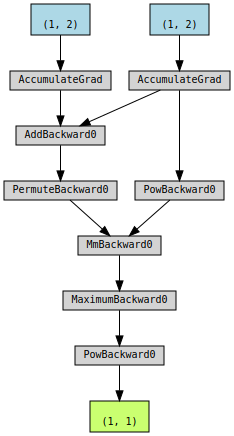

In [41]:
a = torch.tensor([ [1, 2] ], dtype=float, requires_grad=True)
b = torch.tensor([ [3, 4] ], dtype=float, requires_grad=True)

d = (a ** 2)
c = (a + b).T

e = d @ c
e = torch.maximum(e, torch.zeros_like(e))

f = e ** 3

torchviz.make_dot(f)

#### Computing Gradients

Scenario: 2-Layer MLP with ReLU activation for learning floating-point subtraction

- Data: $X \in \mathbb{R}^{2\times m}, Y_{true} \in \mathbb{R}^{1\times m}$

- Forward Pass: \\
  
  $$W_1 \in \mathbb{R}^{2\times2}, W_2 \in \mathbb{R}^{1\times2}, b_1 \in \mathbb{R}^{2\times1}, b_2 \in \mathbb{R}$$


  1. $$ H_1 = \text{ReLU}(W_1 X + b) $$
  2. $$ Y_{predicted} = W_2 H_1 + b_2 $$

- Loss Function: MSE
  $$L(W_1, W_2, b_1, b_2) = \frac{1}{2m}\sum_{i=1}^{m}(y_{predicted}^{(i)} - y_{true}^{(i)})^2$$
  $$\implies L(W_1, W_2, b_1, b_2) = \frac{1}{2m} (Y_{predicted} - Y_{true})^\top(Y_{predicted} - Y_{true})$$

- Backward Pass:
  - $$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial Y_{p}}\frac{\partial Y_{p}}{\partial W_2} = \frac{1}{m} (Y_p - Y_t) H_1^\top $$
  - $$\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial Y_{p}}\frac{\partial Y_{p}}{\partial b_2} = \frac{1}{m} \sum_{i=1}^{m} (y_p^{(i)} - y_t^{(i)}) $$
  - $$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial Y_{p}}\frac{\partial Y_{p}}{\partial H_1}\frac{\partial H_1}{\partial W_1} = \frac{1}{m} ( W_2^\top (Y_p - Y_t)  \cdot [H_1 > 0] ) X^\top $$
  - $$\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial Y_{p}}\frac{\partial Y_{p}}{\partial H_1}\frac{\partial H_1}{\partial b_1} = \frac{1}{m} \sum_{i=1}^{m} ( W_2^\top (Y_p - Y_t)  \cdot [H_1 > 0] ) ^ {(i)}$$

In [42]:
# Define functions for a simple 2 layer feed forward / fully-connected MLP

def mlp_init(x_dim, y_dim):
    prng = numpy.random.default_rng(seed=20240130)
    W1 = prng.uniform(-1, 1, size=(2, x_dim))
    W2 = prng.uniform(-1, 1, size=(y_dim, 2))
    b1 = numpy.zeros((2, 1))
    b2 = numpy.zeros((y_dim, 1))

    return W1, W2, b1, b2

def mlp_forward(x, W1, W2, b1, b2):
    if len(x.shape) < 2: x = x[:, numpy.newaxis].T
    h1 = (W1 @ x.T) + b1
    h1 = numpy.maximum(h1, 0)
    return h1, ((W2 @ h1) + b2).T

def mlp_backward(x, y, h, y_pred, W1, W2, b1, b2, lr=0.01, debug=False):
    if len(x.shape) < 2: x = x[:, numpy.newaxis].T
    if len(y.shape) < 2: y = y[:, numpy.newaxis]
    if len(y_pred.shape) < 2: y_pred = y_pred[:, numpy.newaxis]

    # compute gradients as per SE
    num_pts = x.shape[0]
    grad_y_pred = (y_pred - y).T / num_pts

    grad_h = W2.T @ grad_y_pred
    grad_h[h <= 0] = 0

    grad_W1 = grad_h @ x
    grad_W2 = grad_y_pred @ h.T
    grad_b1 = numpy.sum(grad_h, axis=1, keepdims=True)
    grad_b2 = numpy.sum(grad_y_pred, axis=1, keepdims=True)

    if debug:
        print("Gradients:")
        print("W2", grad_W2)
        print("b2", grad_b2)
        print("W1", grad_W1)
        print("b1", grad_b1)

    # # update weights
    W1 = W1 - lr * grad_W1
    W2 = W2 - lr * grad_W2
    b1 = b1 - lr * grad_b1
    b2 = b2 - lr * grad_b2

    return W1, W2, b1, b2

In [43]:
prng = numpy.random.default_rng(seed=20240130)
X = prng.random(size=(1000, 2))
Y = (X[:, 0] - X[:, 1]).reshape(-1, 1)

In [44]:
losses = []
W1, W2, b1, b2 = mlp_init(X.shape[-1], Y.shape[-1])

print("W2", W2)
print("b2", b2)
print("W1", W1)
print("b1", b1)

num_epochs = 100
batch_size = 10
num_batches = len(X) // batch_size

with tqdm.tqdm(total = num_epochs * num_batches) as pbar:
    for epoch in range(num_epochs):
        pbar.set_description(f"Epoch #{epoch+1}")

        for i in range(num_batches):
            start = i * batch_size
            end = start + batch_size
            x_batch = X[start:end]
            y_batch = Y[start:end]

            h, y_pred = mlp_forward(x_batch, W1, W2, b1, b2)
            loss = 0.5 * numpy.mean((y_pred - y_batch) ** 2)
            losses.append(float(loss.squeeze()))
            debug = (epoch == 0 and i == 0)
            W1, W2, b1, b2 = mlp_backward(x_batch, y_batch, h, y_pred, W1, W2, b1, b2, debug=debug)

            pbar.update(1)
            pbar.set_postfix(dict(loss=loss))

W2 [[-0.96556742  0.5608425 ]]
b2 [[0.]]
W1 [[-0.28613537 -0.97961328]
 [ 0.67821594 -0.97100856]]
b1 [[0.]
 [0.]]


  0%|          | 0/10000 [00:00<?, ?it/s]

Gradients:
W2 [[ 0.         -0.07051224]]
b2 [[-0.05439567]]
W1 [[ 0.          0.        ]
 [-0.07764534 -0.01350559]]
b1 [[ 0.        ]
 [-0.12034697]]


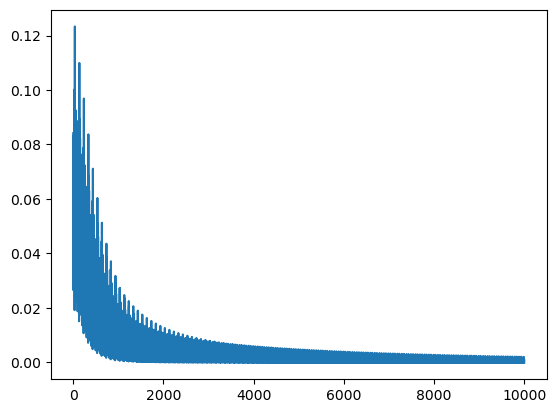

In [45]:
pyplot.plot(losses)

In [46]:
mlp_forward(numpy.array([ 0.69, 0.42 ]), W1, W2, b1, b2)[-1].squeeze()

array(0.27104206)

##### Simplification with PyTorch autograd

In [47]:
torch.manual_seed(20240130)

In [48]:
X = torch.as_tensor(X)
Y = torch.as_tensor(Y)

In [49]:
def mlp_init_pt(x_dim, y_dim):
    prng = numpy.random.default_rng(seed=20240130)
    W1 = prng.uniform(-1, 1, size=(2, x_dim))
    W2 = prng.uniform(-1, 1, size=(y_dim, 2))
    W1 = torch.tensor(W1, requires_grad=True)
    W2 = torch.tensor(W2, requires_grad=True)
    b1 = torch.zeros((2, 1), requires_grad=True)
    b2 = torch.zeros((y_dim, 1), requires_grad=True)

    return W1, W2, b1, b2

def mlp_forward_pt(x, W1, W2, b1, b2):
    if len(x.shape) < 2: x = x[:, None].T
    h1 = (W1 @ x.T) + b1
    h1 = torch.maximum(h1, torch.zeros_like(h1))
    return h1, ((W2 @ h1) + b2).T

def mlp_backward_pt(loss, W1, W2, b1, b2, lr=0.01, debug=False):
    loss.backward()

    if debug:
        print("Gradients:")
        print("W2", W2.grad)
        print("b2", b2.grad)
        print("W1", W1.grad)
        print("b1", b1.grad)

    # update weights
    W1.data = W1 - lr * W1.grad
    W2.data = W2 - lr * W2.grad
    b1.data = b1 - lr * b1.grad
    b2.data = b2 - lr * b2.grad

    W1.grad = W2.grad = b1.grad = b2.grad = None

    return W1, W2, b1, b2

In [50]:
losses = []
W1, W2, b1, b2 = mlp_init_pt(X.shape[-1], Y.shape[-1])

print("W2", W2)
print("b2", b2)
print("W1", W1)
print("b1", b1)

num_epochs = 100
batch_size = 10
num_batches = len(X) // batch_size

with tqdm.tqdm(total = num_epochs * num_batches) as pbar:
    for epoch in range(num_epochs):
        pbar.set_description(f"Epoch #{epoch+1}")

        for i in range(num_batches):
            start = i * batch_size
            end = start + batch_size
            x_batch = X[start:end]
            y_batch = Y[start:end]

            h, y_pred = mlp_forward_pt(x_batch, W1, W2, b1, b2)
            loss = 0.5 * torch.mean((y_pred - y_batch) ** 2)

            losses.append(loss.squeeze().item())
            debug = (epoch==0 and i == 0)
            W1, W2, b1, b2 = mlp_backward_pt(loss, W1, W2, b1, b2, debug=debug)

            pbar.update(1)
            pbar.set_postfix(dict(loss=loss.item()))

W2 tensor([[-0.9656,  0.5608]], dtype=torch.float64, requires_grad=True)
b2 tensor([[0.]], requires_grad=True)
W1 tensor([[-0.2861, -0.9796],
        [ 0.6782, -0.9710]], dtype=torch.float64, requires_grad=True)
b1 tensor([[0.],
        [0.]], requires_grad=True)


  0%|          | 0/10000 [00:00<?, ?it/s]

Gradients:
W2 tensor([[ 0.0000, -0.0705]], dtype=torch.float64)
b2 tensor([[-0.0544]])
W1 tensor([[ 0.0000,  0.0000],
        [-0.0776, -0.0135]], dtype=torch.float64)
b1 tensor([[ 0.0000],
        [-0.1203]])


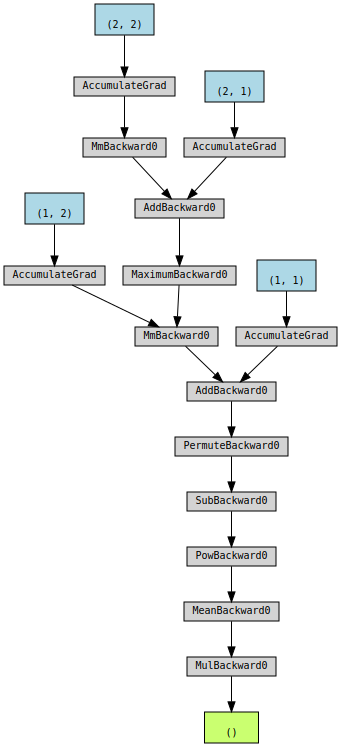

In [51]:
torchviz.make_dot(loss)

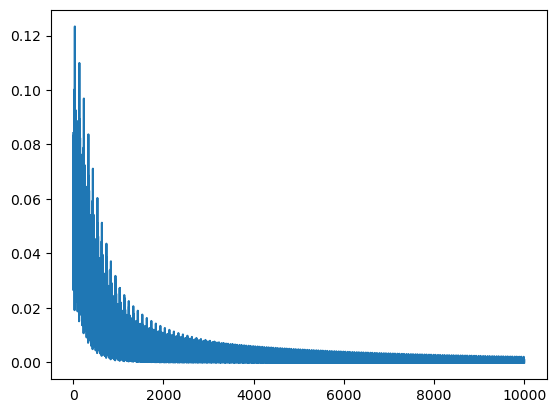

In [52]:
pyplot.plot(losses)

In [53]:
mlp_forward_pt(torch.tensor([ 0.69, 0.42 ], dtype=torch.float64), W1, W2, b1, b2)[-1]

tensor([[0.2710]], dtype=torch.float64, grad_fn=<PermuteBackward0>)

#### Inference Methods

- `torch.Tensor.detach()` and `torch.no_grad()`

In [54]:
a = torch.rand((2, 2), requires_grad=True)
b = torch.rand((2, 2), requires_grad=True)

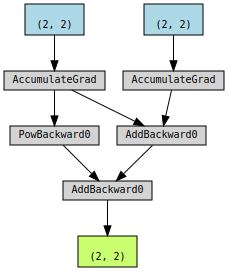

In [55]:
c = a + b
d = a ** 2

e = c + d

torchviz.make_dot(e)

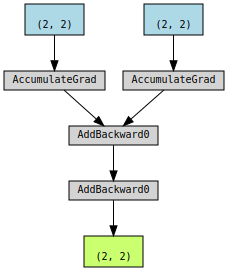

In [56]:
c = a + b
d = (a ** 2).detach()

e = c + d

torchviz.make_dot(e)

In [57]:
# faster inference with torch.no_grad

with torch.no_grad():
    print(mlp_forward_pt(torch.tensor([ 0.69, 0.42 ], dtype=torch.float64), W1, W2, b1, b2)[-1])

tensor([[0.2710]], dtype=torch.float64)


####

### Deep Learning with PyTorch

#### `torch.nn`

- Some helper network layers:

In [58]:
# Standard NN Components: Linear, Embedding, Flatten, Convolutional

torch.nn.Linear(2, 4)
torch.nn.Embedding(50378, 768)
torch.nn.Conv2d(3, 7, (3, 3))
torch.nn.LSTM(768, 256)
torch.nn.AvgPool2d((3, 3))
torch.nn.Flatten()

Flatten(start_dim=1, end_dim=-1)

In [59]:
# Activation: Sigmoid, ReLU, Softmax

torch.nn.ReLU()
torch.nn.Sigmoid()
torch.nn.Softmax(dim=-1)

Softmax(dim=-1)

In [60]:
# Regularization and Normalization: Dropout, BatchNorm

torch.nn.Dropout(0.2)
torch.nn.BatchNorm1d(4)

BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [61]:
# Compositional: Sequential, ModuleDict, ModuleList

model = torch.nn.Sequential(
    torch.nn.Linear(X.shape[-1], 2),
    torch.nn.ReLU(), 
    torch.nn.Linear(2, Y.shape[-1])
)

- Multiple ways to create networks:

In [62]:
model = torch.nn.Sequential(
    torch.nn.Linear(X.shape[-1], 2),
    torch.nn.ReLU(),
    torch.nn.Linear(2, Y.shape[-1])
)

In [63]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

0.weight True
0.bias True
2.weight True
2.bias True


In [64]:
class MLP(torch.nn.Module):

    def __init__(self, x_dim, y_dim):
        """ Initialize your network here.

            You may have any hyperparameters you wish to use to customize the model here.
        """
        super().__init__()

        self.layer_1 = torch.nn.Linear(x_dim, 2)
        self.layer_1_act = torch.nn.ReLU()
        self.layer_2 = torch.nn.Linear(2, y_dim)

    def forward(self, inputs):
        """ Forward pass over your network.

            As an implementor, simply express how you want the inputs to be processed, and what the final output would be.
            PyTorch takes care of the rest: the backward pass, the connections, the gradient computation, the parameter updates, and more!
        """

        hidden = self.layer_1_act(self.layer_1(inputs))
        return self.layer_2(hidden)

In [65]:
model = MLP(2, 1)

for name, param in model.named_parameters():
    print(name, param.requires_grad)

layer_1.weight True
layer_1.bias True
layer_2.weight True
layer_2.bias True


In [66]:
model

MLP(
  (layer_1): Linear(in_features=2, out_features=2, bias=True)
  (layer_1_act): ReLU()
  (layer_2): Linear(in_features=2, out_features=1, bias=True)
)

##### Losses and Mathematical Utility Functions

In [67]:
# loss functions for classification (as modules and as functions)

loss_function = torch.nn.CrossEntropyLoss()
loss_function = torch.nn.functional.cross_entropy

# or

loss_function = torch.nn.NLLLoss()
loss_function = torch.nn.functional.nll_loss

In [68]:
# loss functions for regression (as module and as function)

loss_function = torch.nn.MSELoss()
loss_function = torch.nn.functional.mse_loss

In [69]:
# functions in torch.nn.functional: losses, layers, activations, etc.

torch.nn.functional.kl_div
torch.nn.functional.dropout
torch.nn.functional.softmax
torch.nn.functional.relu

<function torch.nn.functional.relu(input: torch.Tensor, inplace: bool = False) -> torch.Tensor>

#### Utilities for handling datasets

```torch.utils.data.Dataset```

In [70]:
from torch.utils.data import Dataset, DataLoader

In [71]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.as_tensor(X, dtype=torch.float32)
        self.Y = torch.as_tensor(Y, dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return (self.X[index], self.Y[index])

In [72]:
dataset = CustomDataset(X, Y)

```torch.utils.data.DataLoader```

In [73]:
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

for x_batch, y_batch in dataloader:
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([10, 2]) torch.Size([10, 1])


#### Optimization with `torch.optim`

In [74]:
# defining an optimizer for a model (instance of nn.Module)

model = MLP(X.shape[-1], Y.shape[-1])
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [75]:
def mlp_init_true_pt(x_dim, y_dim):
    model = MLP(X.shape[-1], Y.shape[-1])
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    return model, optimizer

def mlp_forward_true_pt(X, model):
    return model(X)

def mlp_backward_true_pt(loss, model, optimizer):
    loss.backward()
    optimizer.step()
    model.zero_grad()

#### Putting it all together

In [76]:
losses = []
model, optimizer = mlp_init_true_pt(X.shape[-1], Y.shape[-1])

num_epochs = 100
batch_size = 10

dataset = CustomDataset(X, Y)
dataloader = DataLoader(dataset, batch_size, shuffle=True)

with tqdm.tqdm(total = num_epochs * len(dataloader)) as pbar:
    for epoch in range(num_epochs):
        pbar.set_description(f"Epoch #{epoch+1}")

        for x_batch, y_batch in dataloader:
            y_pred = mlp_forward_true_pt(x_batch, model)
            loss = torch.nn.functional.mse_loss(y_pred, y_batch)
            mlp_backward_true_pt(loss, model, optimizer)

            pbar.update(1)
            pbar.set_postfix(dict(loss=loss.item()))
            losses.append(loss.cpu().item())

  0%|          | 0/10000 [00:00<?, ?it/s]

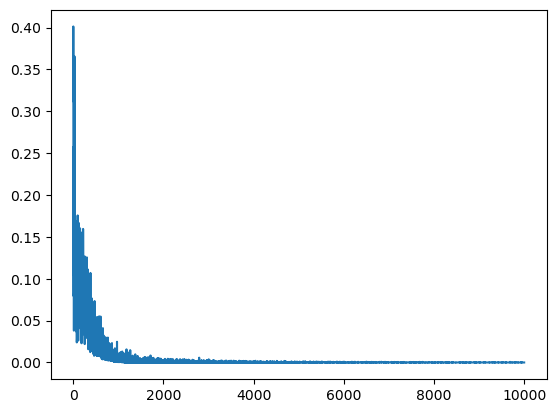

In [77]:
pyplot.plot(losses)

#### Inference Caveats

- `torch.nn.Module.eval()`:

In [79]:
# correct way to do infererence from any trained model

model.eval() # or model.train(False)

with torch.no_grad():
    print(model(torch.tensor([[ 0.69, 0.42 ]])))

tensor([[0.2700]])


##### Saving and Loading Trained Models

In [ ]:
# save the model
torch.save(model, "model.pt")

# load the model back
model = torch.load(model, "model.pt")

### References

- [Deep Learning with PyTorch: a 60 Minute Blitz by pytorch.org](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [Tutorials about different things PyTorch](https://pytorch.org/tutorials)
  - [Introduction to PyTorch - YouTube Series](https://pytorch.org/tutorials/beginner/introyt.html)
- PyTorch Repository on [GitHub](https://github.com/pytorch/pytorch)
- [PyTorch Cheatsheet for Quick References](https://pytorch.org/tutorials/beginner/ptcheat.html)